In [1]:
The objective of this is to detect hate speech in tweets. For the sake of simplicity.
we say a tweet contains hate speech if it has a racist or sexiest sentiment associated
with it. So the task to classify racist or sexist tweets from other tweets.



In [17]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

In [19]:
df = pd.read_csv('Twitter Sentiments.csv')
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [43]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


# Preprocessing

In [51]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt) # here i have used re as regular expression
    for word in r:
        input_txt = re.sub(word,"", input_txt)
    return input_txt

In [53]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [55]:
#here i am removing (@ from user) or twitter handle
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")

In [57]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [59]:
# here i am removing sp.charc, numbers and punctuations
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [61]:
# here i am removing short words like is,a,i,etc.
df['clean_tweet']=df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit can't cause they don't off...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...
4,5,0,factsguide: society now #motivation,factsguide: society #motivation


In [65]:
#now i am tokenization-converting the sentences into small tokens
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, can't, cause, they, do...
2                              [bihday, your, majesty]
3    [#model, love, take, with, time, urð±!!!, ð...
4                  [factsguide:, society, #motivation]
Name: clean_tweet, dtype: object

In [67]:
# here now i stem the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()


0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, can't, caus, they, don'...
2                              [bihday, your, majesti]
3    [#model, love, take, with, time, urð±!!!, ð...
4                       [factsguide:, societi, #motiv]
Name: clean_tweet, dtype: object

In [73]:
#here ia combinig the words into single sentences
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i]= " ".join(tokenized_tweet[i])

df['clean_tweet'] = tokenized_tweet
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,w h e n f a t h e r ...
1,2,0,@user @user thanks for #lyft credit i can't us...,t h a n k # l y f t ...
2,3,0,bihday your majesty,b i h d a y y o u r ...
3,4,0,#model i love u take with u all the time in ...,# m o d e l l o v e ...
4,5,0,factsguide: society now #motivation,f a c t s g u i d e : ...


# Data Analysis(EDA)

In [84]:
!pip install wordcloud

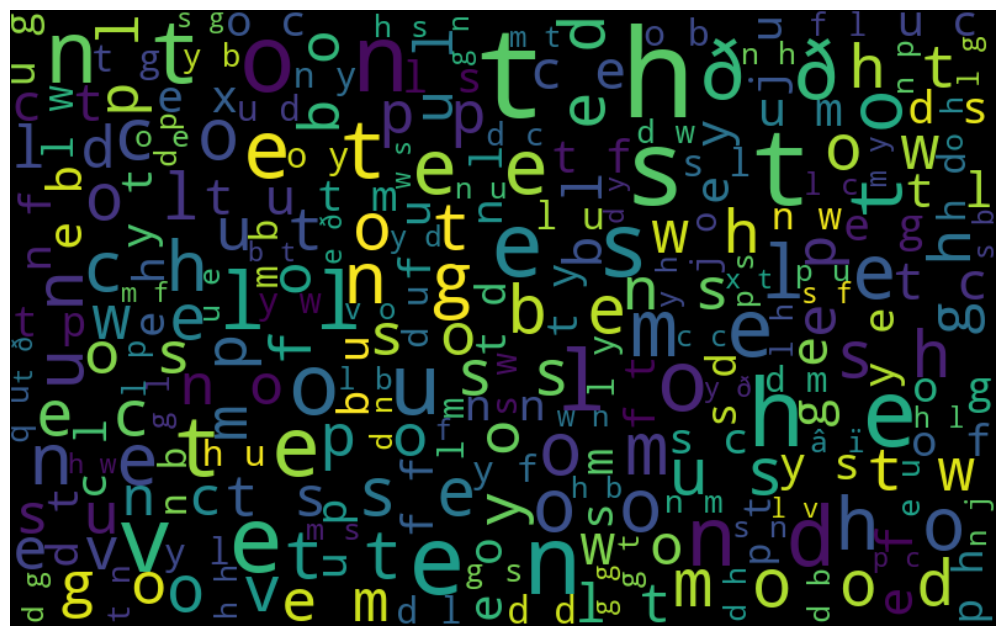

In [98]:
all_words = " ".join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud
wordcloud= WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#here i am graph plotting
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

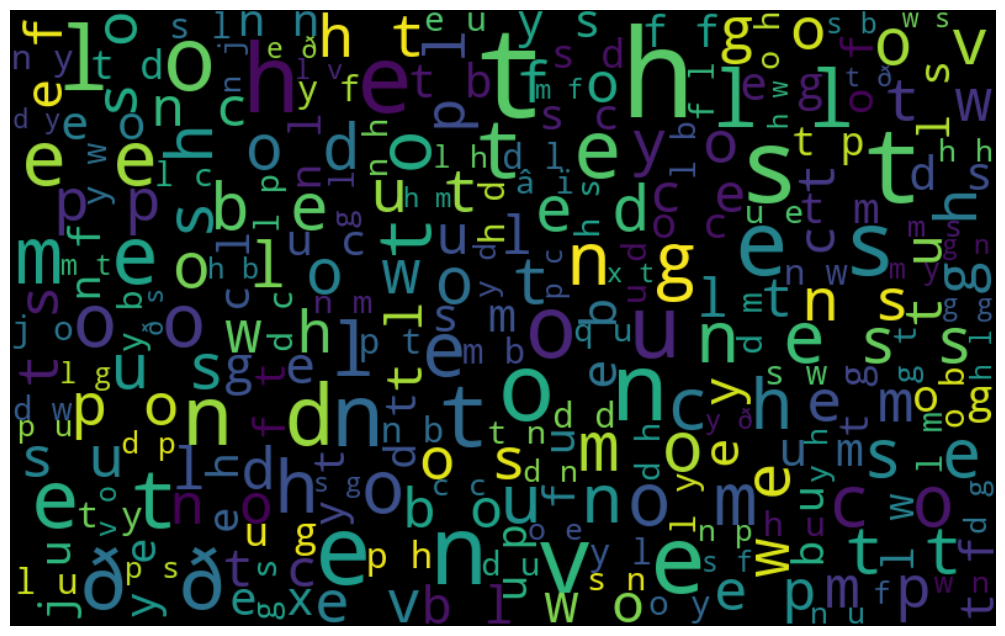

In [100]:
#frequent words visualization for +ve tweets
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==0]])

from wordcloud import WordCloud
wordcloud= WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#here i am graph plotting
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


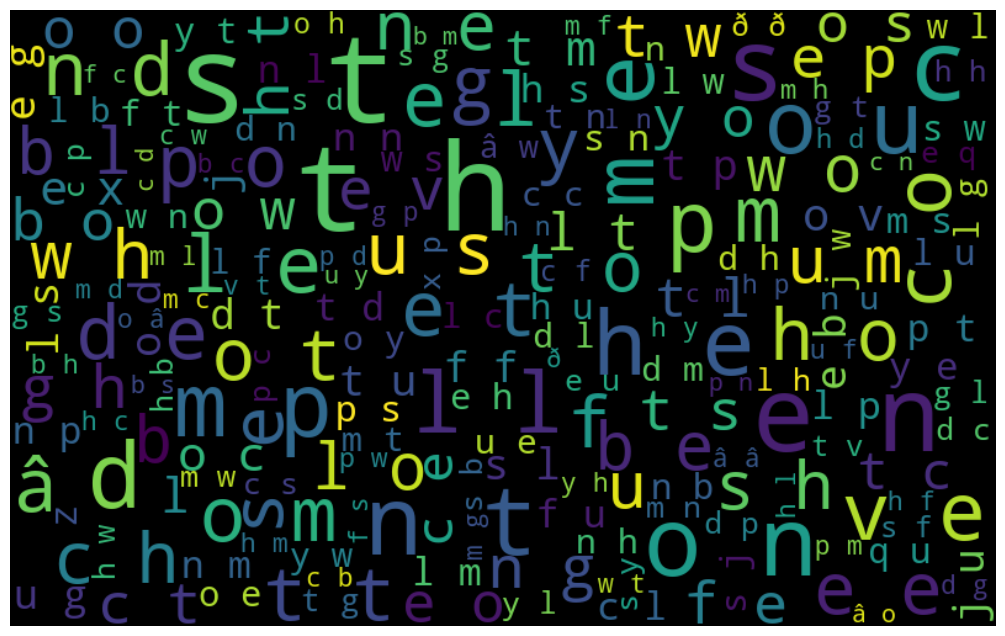

In [104]:
#frequent words visualization for -ve tweets
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==1]])

from wordcloud import WordCloud
wordcloud= WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#here i am graph plotting
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [146]:
# here i am extracting the hastags
import re

def hashtag_extract(tweets):
    hashtags = []
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags

In [148]:
ht_positive = hashtag_extract(df['clean_tweet'][df['label']==0])
ht_negative = hashtag_extract(df['clean_tweet'][df['label']==1])


In [156]:
ht_positive[:5]

[[], [], [], [], []]

In [158]:
print(df['clean_tweet'][df['label']==0].head(10).tolist())


['w   h   e   n       f   a   t   h   e   r       d   y   s   f   u   n   c   t       s   e   l   f   i   s   h       d   r   a   g       k   i   d       i   n   t   o       d   y   s   f   u   n   c   t   i   o   n   .       #   r   u   n', "t   h   a   n   k       #   l   y   f   t       c   r   e   d   i   t       c   a   n   '   t       c   a   u   s       t   h   e   y       d   o   n   '   t       o   f   f   e   r       w   h   e   e   l   c   h   a   i   r       v   a   n       p   d   x   .       #   d   i   s   a   p   o   i   n   t       #   g   e   t   t   h   a   n   k", 'b   i   h   d   a   y       y   o   u   r       m   a   j   e   s   t   i', '#   m   o   d   e   l       l   o   v   e       t   a   k   e       w   i   t   h       t   i   m   e       u   r   ð   \x9f   \x93   ±   !   !   !       ð   \x9f   \x98   \x99   ð   \x9f   \x98   \x8e   ð   \x9f   \x91   \x84   ð   \x9f   \x91       ð   \x9f   \x92   ¦   ð   \x9f   \x92   ¦   ð   \x9f   \x92   ¦', 'f   a   c   t

In [160]:
# This would remove all non-alphanumeric characters, including hashtags
df['clean_tweet'] = df['tweet'].str.replace(r'[^A-Za-z0-9\s]', '', regex=True)


In [162]:
ht_positive = hashtag_extract(df['tweet'][df['label']==0])
ht_negative = hashtag_extract(df['tweet'][df['label']==1])


In [164]:
import re
test = "This is a test tweet with a #hashtag and another #Example123"
print(re.findall(r"#(\w+)", test))  # Output: ['hashtag', 'Example123']


['hashtag', 'Example123']


In [166]:
ht_positive[5:]

[['allshowandnogo'],
 [],
 ['school',
  'exams',
  'hate',
  'imagine',
  'actorslife',
  'revolutionschool',
  'girl'],
 ['allin', 'cavs', 'champions', 'cleveland', 'clevelandcavaliers'],
 ['gr8'],
 ['ireland', 'blog', 'silver', 'gold', 'forex'],
 ['orlando',
  'standwithorlando',
  'pulseshooting',
  'orlandoshooting',
  'biggerproblems',
  'selfish',
  'heabreaking',
  'values',
  'love'],
 ['80days', 'gettingfed'],
 ['got7', 'junior', 'yugyoem', 'omg'],
 ['thankful', 'positive'],
 ['friday', 'cookies'],
 [],
 ['euro2016'],
 ['badday', 'coneofshame', 'cats', 'pissed', 'funny', 'laughs'],
 ['wine', 'weekend'],
 ['tgif', 'ff', 'gamedev', 'indiedev', 'indiegamedev', 'squad'],
 ['upsideofflorida', 'shopalyssas', 'love'],
 ['smiles', 'media', 'pressconference', 'antalya', 'turkey', 'throwback'],
 ['ica16'],
 [],
 ['rip', 'orlando'],
 [],
 ['alohafriday', 'time', 'not', 'exist', 'positivevibes', 'hawaiian'],
 [],
 ['goodnight', 'badmonday'],
 ['taylorswift1989'],
 ['travelingram', 'dalat'

In [168]:
ht_positive[:5]

[['run'], ['lyft', 'disapointed', 'getthanked'], [], ['model'], ['motivation']]

In [170]:
ht_positive= sum(ht_positive, [])
ht_negative= sum(ht_negative, [])

In [171]:
ht_positive[:5]

['run', 'lyft', 'disapointed', 'getthanked', 'model']

In [176]:
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag' :list(freq.keys()),
                 'Count':list(freq.values())})
d.head()

,Hashtag,Count
0,run,33
1,lyft,2
2,disapointed,1
3,getthanked,2
4,model,364


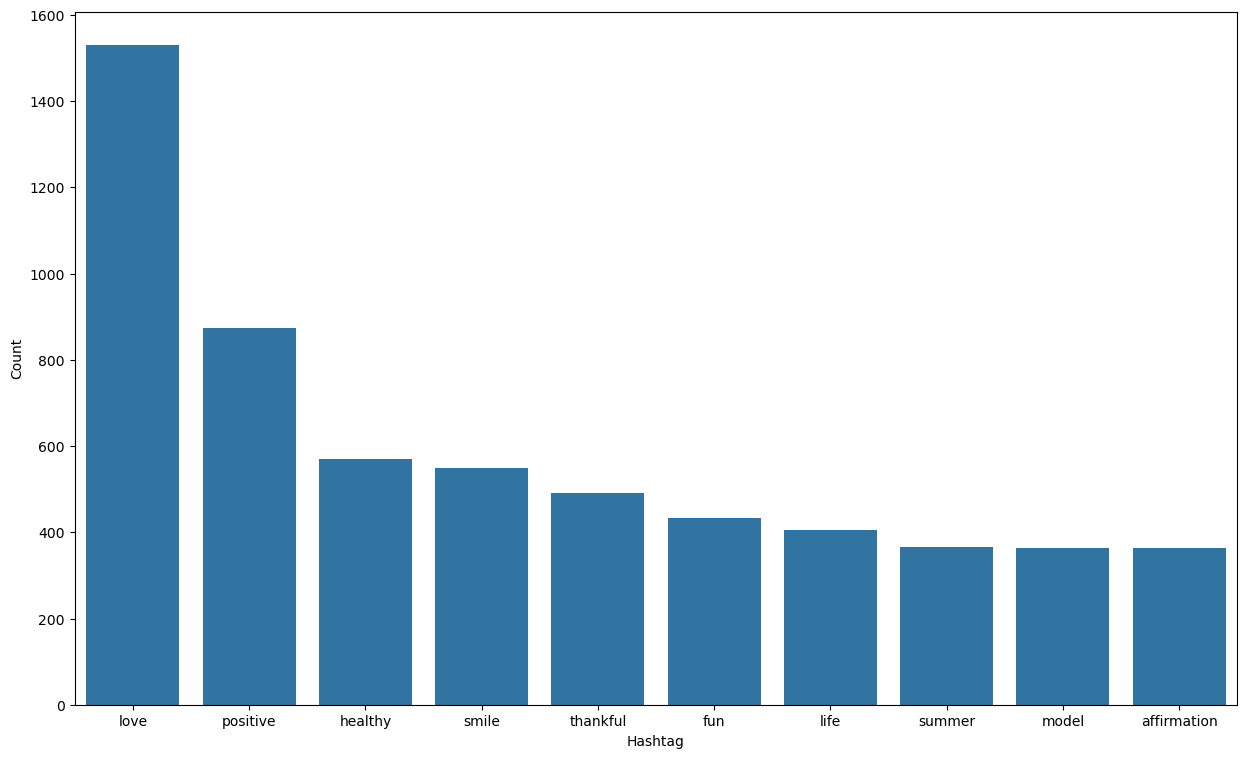

In [178]:
# here im using seaborn for visualization for the top 10 non racist tweets
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

In [180]:
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag' :list(freq.keys()),
                 'Count':list(freq.values())})
d.head()

,Hashtag,Count
0,cnn,9
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,2


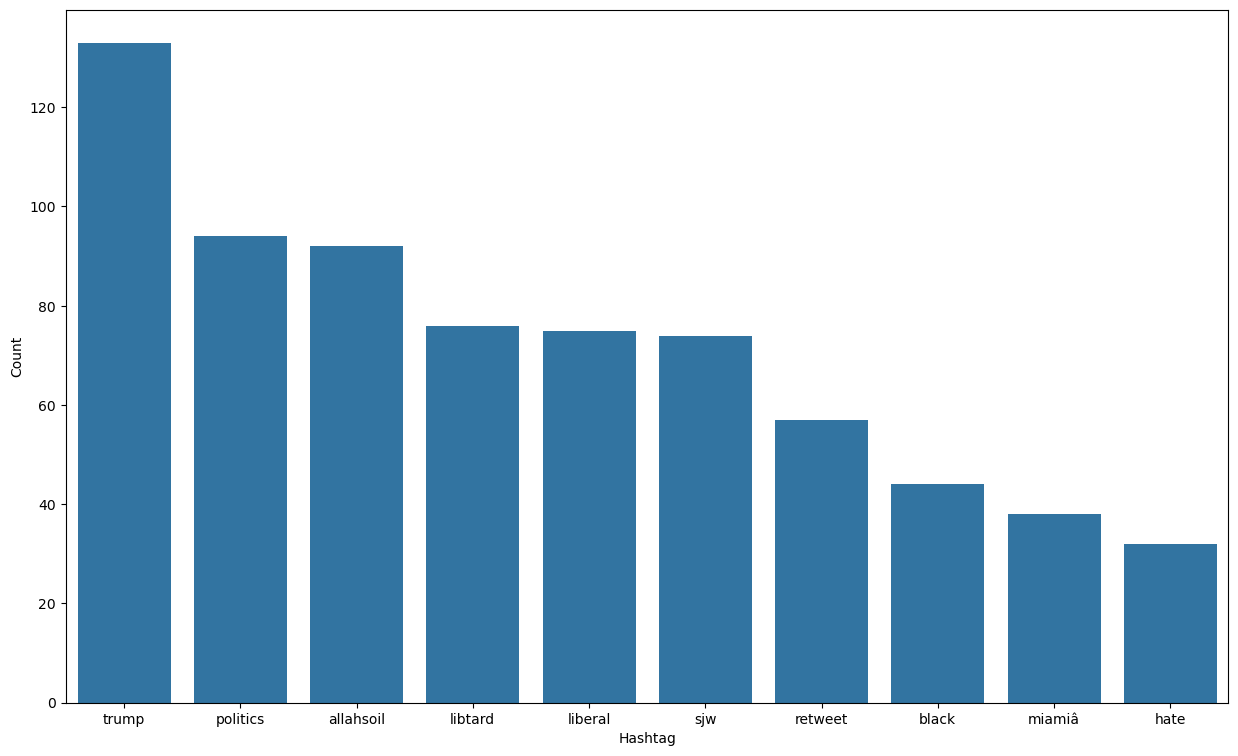

In [182]:
# here im using seaborn for visualization for the top 10 racist tweets
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

# feature selection extraction

In [187]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow=bow_vectorizer.fit_transform(df['clean_tweet'])

In [193]:
#bow[0].toarray()

In [208]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['label'], random_state=42, test_size=0.25)

# Model Training

In [240]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

In [242]:
#training
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [244]:
#testing
pred = model.predict(x_test)
f1_score(y_test, pred) #here i am using f1-score cuz it wiln balance the positive tweet
#and the negative tweet

0.49325153374233127

In [246]:
accuracy_score(y_test, pred)

0.9483168564635215

In [248]:
# use probablity toget the output
pred_prob= model.predict_proba(x_test)
pred= pred_prob[:, 1] >= 0.3
pred= pred.astype(int)

f1_score(y_test, pred)

0.5585215605749486

In [258]:
precision = precision_score(y_test, pred)

In [260]:
print(f"Precision: {precision}")

Precision: 0.655421686746988


In [264]:
recall = recall_score(y_test, pred)
print(f"Recall: {recall}")

Recall: 0.4865831842576029


In [256]:
accuracy_score(y_test,pred)

0.9461894631460392

In [268]:
pred_prob[0][1] >= 0.3

False